# Movie rating Prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens/users.dat
/kaggle/input/movielens/ratings.dat
/kaggle/input/movielens/movies.dat


In [2]:
users = pd.read_csv("/kaggle/input/movielens/users.dat", sep = '::', engine='python')
users.columns =['User_id','Gender','Age','Occupation','Zipcode']


In [3]:
users.head(5)

,User_id,Gender,Age,Occupation,Zipcode
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [4]:
#Data acquisition of the movies dataset
movie=pd.read_csv('/kaggle/input/movielens/movies.dat', sep = '::', engine='python', encoding='latin-1')
movie.columns =['Movie_id','Movie_Name','Genres']


In [5]:
movie.head(2)

,Movie_id,Movie_Name,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance


In [6]:
movie.isnull().sum()

Movie_id      0
Movie_Name    0
Genres        0
dtype: int64

In [7]:
rating = pd.read_csv("/kaggle/input/movielens/ratings.dat",sep='::', engine='python')
rating.columns =['User_id','Movie_id','Ratings','TimeStamp']

In [8]:
rating.head(2)

,User_id,Movie_id,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968


In [9]:
rating.isnull().sum()

User_id      0
Movie_id     0
Ratings      0
TimeStamp    0
dtype: int64

In [10]:
movie.nunique()

Movie_id      3882
Movie_Name    3882
Genres         301
dtype: int64

In [11]:
#Merge the ratings and users with movieID and UserID
ratings_user = pd.merge(rating,users, on=['User_id'])
ratings_movie = pd.merge(rating,movie, on=['Movie_id'])

df = pd.merge(ratings_user,ratings_movie,
                       on=['User_id', 'Movie_id', 'Ratings'])[['Movie_id', 'Movie_Name', 'User_id', 'Age', 'Gender', 'Occupation', "Ratings"]]


In [12]:
df.shape

(998080, 7)

In [13]:
df.nunique()

Movie_id      3705
Movie_Name    3705
User_id       6039
Age              7
Gender           2
Occupation      21
Ratings          5
dtype: int64

In [14]:
df["Age"].value_counts()

25    394766
35    198580
18    183088
45     83490
50     72382
56     38727
1      27047
Name: Age, dtype: int64

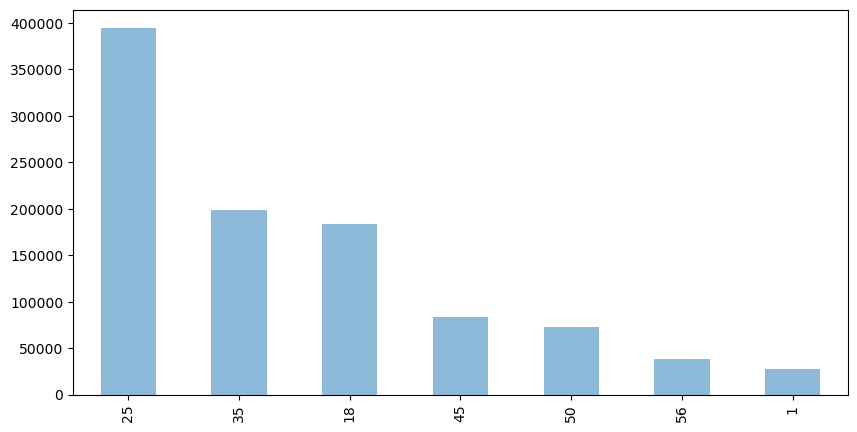

In [15]:
import matplotlib.pyplot as plt
df['Age'].value_counts().plot(kind='bar',alpha=0.5,figsize=(10,5))
plt.show()

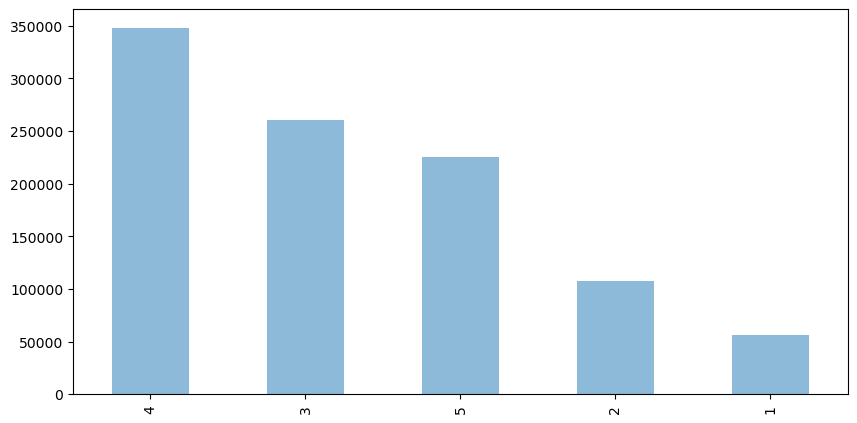

In [16]:
df['Ratings'].value_counts().plot(kind='bar',alpha=0.5,figsize=(10,5))
plt.show()

<Axes: ylabel='Movie_Name'>

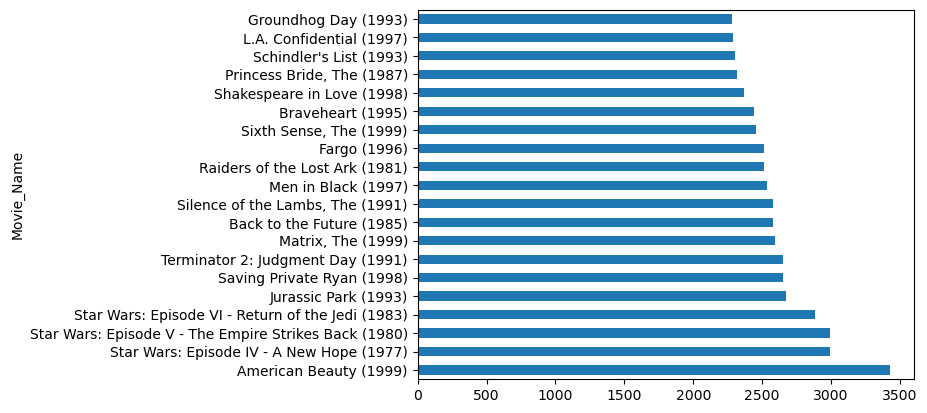

In [17]:
result = df.groupby("Movie_Name").size().sort_values(ascending=False)[:20]
plt.ylabel("Movie_Name")
plt.xlabel("Viewership Count")
result.plot(kind="barh")

Age
1      36
18    154
25    261
35    143
45     52
50     45
56     10
Name: Movie_id, dtype: int64

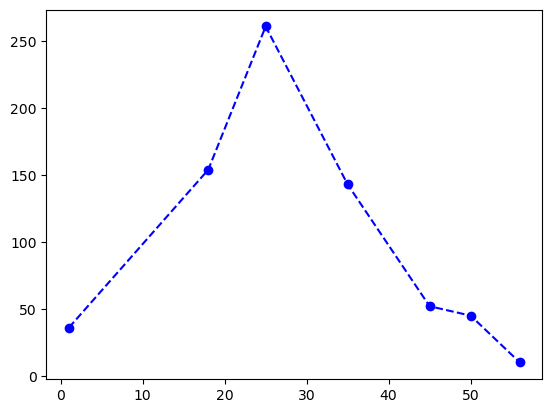

In [18]:
movie_age = df[df.Movie_Name == "Jumanji (1995)"]

plt.plot(movie_age.groupby("Age")["Movie_id"].count(),'--bo')
movie_age.groupby("Age")["Movie_id"].count()

,Movie_id,Movie_Name,User_id,Age,Gender,Occupation,Ratings
439719,1258,"Shining, The (1980)",2696,25,M,7,4
439720,1270,Back to the Future (1985),2696,25,M,7,2
439721,1617,L.A. Confidential (1997),2696,25,M,7,4
439722,1625,"Game, The (1997)",2696,25,M,7,4
439723,1644,I Know What You Did Last Summer (1997),2696,25,M,7,2
439724,1645,"Devil's Advocate, The (1997)",2696,25,M,7,4
439725,1805,Wild Things (1998),2696,25,M,7,4
439726,1892,"Perfect Murder, A (1998)",2696,25,M,7,4
439727,800,Lone Star (1996),2696,25,M,7,5
439728,2338,I Still Know What You Did Last Summer (1998),2696,25,M,7,2


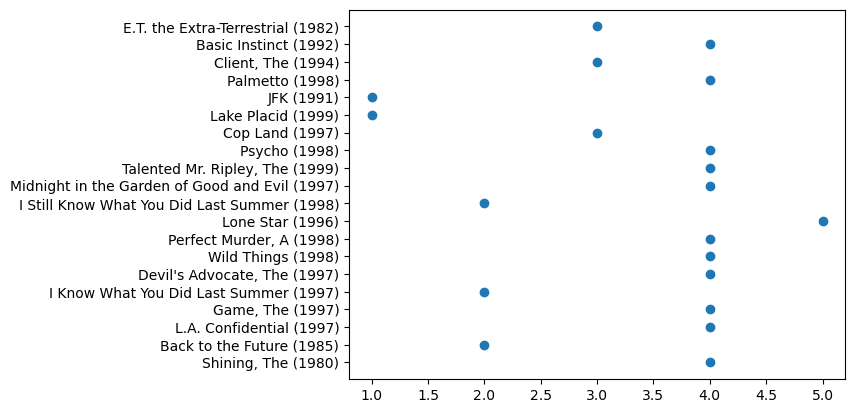

In [19]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696

user_movie = df[df.User_id == 2696]

plt.scatter(y=user_movie.Movie_Name, x=user_movie.Ratings)

user_movie

In [20]:
df.drop(["User_id","Movie_id","Occupation"],axis=1,inplace = True)

In [21]:
df2 = df.head(1000)

In [22]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

X = df2[df2.columns[~df2.columns.isin(["Ratings"])]]
y = df2.Ratings

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [23]:
X_train.head(3)

,Movie_Name,Age,Gender
253,Paris Is Burning (1990),25,M
667,"Bug's Life, A (1998)",25,M
85,Serpico (1973),56,M


In [24]:
X_train.dtypes

Movie_Name    object
Age            int64
Gender        object
dtype: object

In [25]:
numeric_columns=X_train.select_dtypes(['int64']).columns
numeric_columns

Index(['Age'], dtype='object')

In [26]:
cat_columns=X_train.select_dtypes(['object']).columns
cat_columns

Index(['Movie_Name', 'Gender'], dtype='object')

In [27]:
# Importing the required preprocessing libraries:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [28]:
#standardscaler for numerical columns
scaler = StandardScaler()                                                                                                                                                                                                                                                                                                                    
scaler.fit(X_train[numeric_columns])

X_train_num = pd.DataFrame(scaler.transform(X_train[numeric_columns]), columns=numeric_columns)
X_test_num = pd.DataFrame(scaler.transform(X_test[numeric_columns]), columns=numeric_columns)

In [29]:
ohe = OneHotEncoder(handle_unknown='ignore',drop='first')
ohe.fit(X_train[cat_columns])

columns_ohe = list(ohe.get_feature_names_out(cat_columns))

In [30]:
X_train_cat = ohe.transform(X_train[cat_columns])
X_test_cat  = ohe.transform(X_test[cat_columns])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [31]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat  = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

In [32]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [33]:
#checking the shape of train and test:
print(X_train.shape, X_test.shape)

(750, 556) (250, 556)


# LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
Y_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train,y_train) * 100, 2)
acc_log

77.73

# DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier


In [37]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train,y_train) * 100, 2)
acc_decision_tree

93.73